In [1]:
from orbits.sim import SimRun
from astropy import units as u
from astropy.visualization import quantity_support
quantity_support()
from matplotlib import pyplot as plt
from astroquery.jplhorizons import Horizons
from astropy.time import Time

In [2]:
sun = Horizons(id='sun', location="@SSB", epochs=Time("2023-01-01").jd, id_type=None).vectors()

In [3]:
earth = Horizons(id='399', location="@SSB", epochs=Time("2023-01-01").jd, id_type=None).vectors()

In [4]:
run1 = SimRun(0.1*u.d,1*u.year)

In [5]:
run1.add_object('Sun', sun['x'].quantity[0], sun['y'].quantity[0], sun['z'].quantity[0], sun['vx'].quantity[0], sun['vy'].quantity[0], sun['vz'].quantity[0], 1.98840987e+30*u.kg, 695508*u.au)
run1.add_object('Earth', earth['x'].quantity[0], earth['y'].quantity[0], earth['z'].quantity[0], earth['vx'].quantity[0], earth['vy'].quantity[0], earth['vz'].quantity[0], 5.97216787e+24*u.kg, 6371.0*u.au)

In [6]:
run1.run()

In [7]:
run1.objects[1]

{'name': 'Earth',
 'mass': <Quantity 5.97216787e+24 kg>,
 'radius': <Quantity 9.53088034e+14 m>,
 'pvt': <Quantity [([-2.68245610e+10,  1.44897570e+11,  2.41300112e+07], [-2.98148235e+04, -5.29591892e+03, -5.49370075e-01], 0.000000e+00),
            ([-2.70821610e+10,  1.44851814e+11,  2.41252646e+07], [-2.98056493e+04, -5.34810574e+03, -5.46737240e-01], 8.640000e+03),
            ([-2.73396818e+10,  1.44805606e+11,  2.41205408e+07], [-2.97963822e+04, -5.40027623e+03, -5.44102411e-01], 1.728000e+04),
            ...,
            ([-1.20462549e+10,  1.49390926e+11,  2.71649168e+07], [-2.98732475e+04, -2.24824649e+03, -6.89068720e-01], 3.154464e+07),
            ([-1.23043598e+10,  1.49371501e+11,  2.71589632e+07], [-2.98696169e+04, -2.29890656e+03, -6.86668258e-01], 3.155328e+07),
            ([-1.25624333e+10,  1.49351639e+11,  2.71530304e+07], [-2.98658991e+04, -2.34956068e+03, -6.84265495e-01], 3.156192e+07)] (m, m / s, s)>}

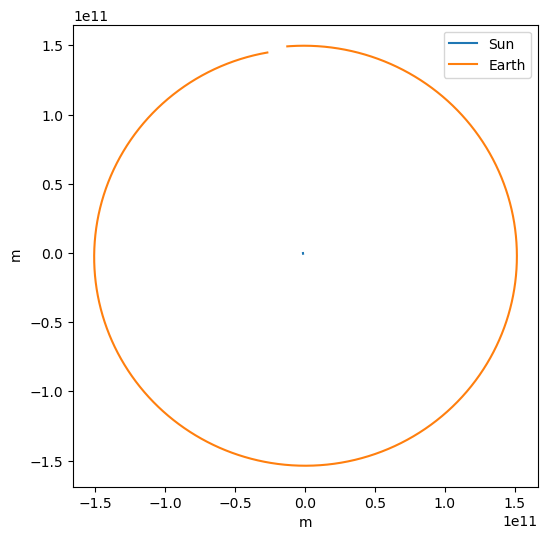

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
for o in run1.objects:
    ax.plot(o['pvt']['p'][:,0],o['pvt']['p'][:,1],label=o['name'])

ax.legend()

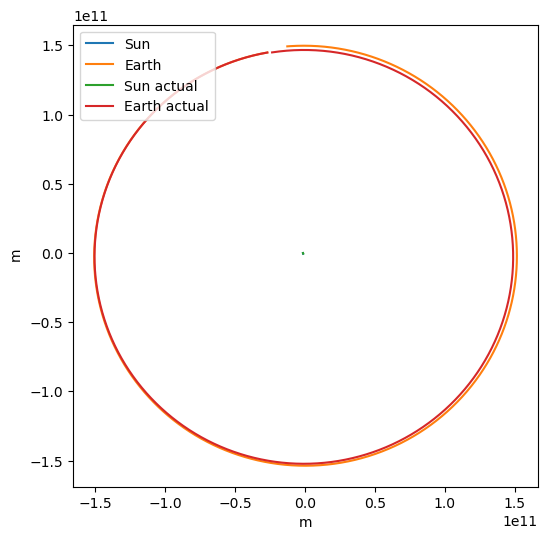

In [9]:
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2023-12-31",'step':'1d'}, id_type=None).vectors()
x1 = sun['x'].quantity
y1 = sun['y'].quantity
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2023-12-31",'step':'1d'}, id_type=None).vectors()
x2 = earth['x'].quantity
y2 = earth['y'].quantity
fig, ax = plt.subplots(figsize=(6, 6))
for o in run1.objects:
    ax.plot(o['pvt']['p'][:,0],o['pvt']['p'][:,1],label=o['name'])
ax.plot(x1, y1, label='Sun actual')
ax.plot(x2, y2, label='Earth actual') 
ax.legend()

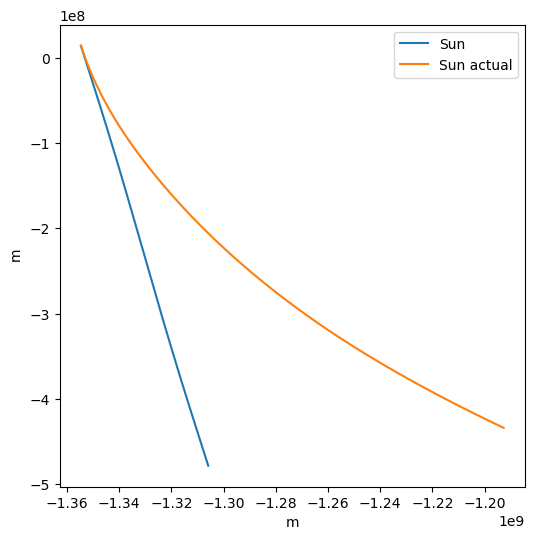

In [11]:
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2023-12-31",'step':'1d'}, id_type=None).vectors()
x1 = sun['x'].quantity
y1 = sun['y'].quantity
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(run1.objects[0]['pvt']['p'][:,0],run1.objects[0]['pvt']['p'][:,1],label=run1.objects[0]['name'])
ax.plot(x1, y1, label='Sun actual')
ax.legend()

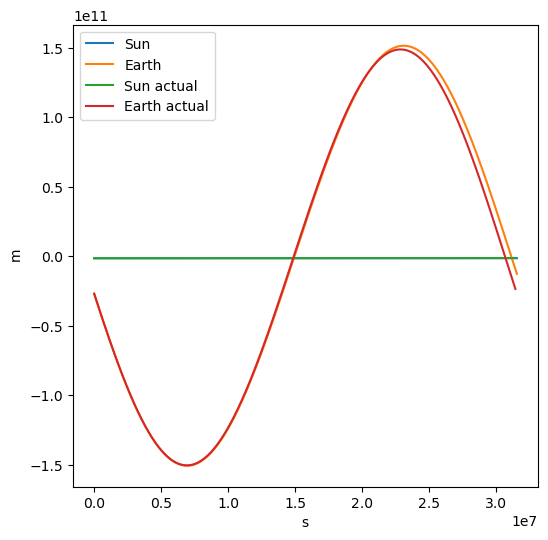

In [17]:
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2023-12-31",'step':'1d'}, id_type=None).vectors()
x1 = sun['x'].quantity
t1 = sun['datetime_jd'].quantity - sun['datetime_jd'].quantity[0]
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2023-12-31",'step':'1d'}, id_type=None).vectors()
x2 = earth['x'].quantity
t2 = earth['datetime_jd'].quantity - earth['datetime_jd'].quantity[0]
fig, ax = plt.subplots(figsize=(6, 6))
for o in run1.objects:
    ax.plot(o['pvt']['t'],o['pvt']['p'][:,0],label=o['name'])
ax.plot(t1, x1, label='Sun actual')
ax.plot(t2, x2, label='Earth actual') 
ax.legend()

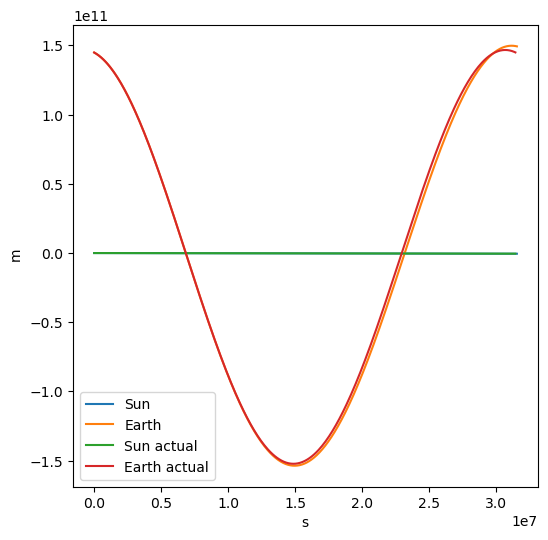

In [19]:
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2023-12-31",'step':'1d'}, id_type=None).vectors()
y1 = sun['y'].quantity
t1 = sun['datetime_jd'].quantity - sun['datetime_jd'].quantity[0]
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2023-12-31",'step':'1d'}, id_type=None).vectors()
y2 = earth['y'].quantity
t2 = earth['datetime_jd'].quantity - earth['datetime_jd'].quantity[0]
fig, ax = plt.subplots(figsize=(6, 6))
for o in run1.objects:
    ax.plot(o['pvt']['t'],o['pvt']['p'][:,1],label=o['name'])
ax.plot(t1, y1, label='Sun actual')
ax.plot(t2, y2, label='Earth actual') 
ax.legend()

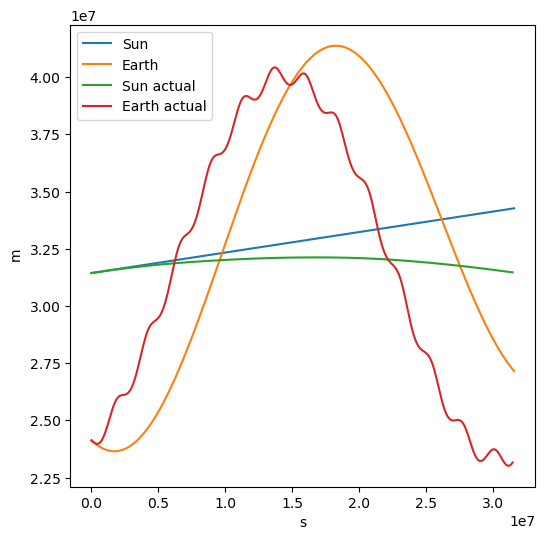

In [20]:
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2023-12-31",'step':'1d'}, id_type=None).vectors()
z1 = sun['z'].quantity
t1 = sun['datetime_jd'].quantity - sun['datetime_jd'].quantity[0]
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2023-12-31",'step':'1d'}, id_type=None).vectors()
z2 = earth['z'].quantity
t2 = earth['datetime_jd'].quantity - earth['datetime_jd'].quantity[0]
fig, ax = plt.subplots(figsize=(6, 6))
for o in run1.objects:
    ax.plot(o['pvt']['t'],o['pvt']['p'][:,2],label=o['name'])
ax.plot(t1, z1, label='Sun actual')
ax.plot(t2, z2, label='Earth actual') 
ax.legend()